In [146]:
import csv
import requests
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
np.random.seed(42)
%matplotlib inline

from sklearn.cluster import dbscan
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import holoviews as hv
from holoviews import dim
hv.extension('matplotlib')

import hvplot.pandas 
import hvplot.dask

import param as pm
import panel as pn

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [114]:
# The number of earthquakes detected worldwide by the USGS
csvurl = 'http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv'
rows = list(csv.DictReader(requests.get(csvurl).text.splitlines()))

"There have been %s earthquakes in the past 30 days." % len(rows)

'There have been 10645 earthquakes in the past 30 days.'

In [115]:
#countries = gpd.read_file("C:/Users/Madhura/Downloads/ne_110m_admin_0_countries")

In [116]:
url = "https://raw.githubusercontent.com/madhurapg/countries/master/countries.geojson"
countries_gpd = gpd.read_file(url)

In [117]:
df1 = pd.read_csv(csvurl)

In [118]:
#import datetime

In [119]:
#df.time = pd.to_datetime(df["time"])
#df['date'] = df['time'].apply(lambda x: x.strftime('%d%m%Y')) 

In [125]:
df2 = df1.drop(["time", "magType", "updated", "place", "type", "status", "locationSource", "magSource", "net", 'id'], axis=1)
df3 = df2.drop(["horizontalError", "depthError", "magError", "magNst"], axis=1)
df4 = df3.drop(["nst", "gap", "dmin"], axis=1)

In [126]:
df4.head()

,latitude,longitude,depth,mag,rms
0,36.102167,-117.849667,3.32,0.89,0.11
1,59.789700,-139.433000,0.00,1.90,1.11
2,61.561200,-141.399500,0.00,2.10,0.44
3,36.309400,70.723000,123.52,4.00,0.56
4,33.140833,-116.483833,8.70,0.97,0.18


In [127]:
# DBSCAN

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df4)

# run DBSCAN 
cores, labels = dbscan(scaled_features, eps=0.25, min_samples=40)

# Add the labels back to the original (unscaled) dataset
df4['label'] = labels

# extract the number of clusters 
num_clusters = df4['label'].nunique() - 1

N = df4.groupby('label').size()
N2 = N.sort_index()
no_noise = list(N2.iloc[1:].index)

#selection = df4['label'].isin(no_noise)

# select top 5 and groupby by the label
#grps = df4.loc[selection].groupby('label')

#avg_values = grps[['depth', 'mag', 'rms']].mean()
#avg_values

In [128]:
# K-means

#df5 = df4
#df5_scaled = scaler.fit_transform(df5)

#kmeans = KMeans(n_clusters=5)

# perform the fit
#kmeans.fit(df5_scaled)

# extract the labels
#df5['label'] = kmeans.labels_

#df5.groupby('label').size()

In [129]:
colors = ['fuchsia', 'lime', 'blue', 'red', 'gold', 'aqua', 'pink', 'blueviolet', 'orange']

In [133]:
df4['datetime'] = df1["time"].dropna()

In [134]:
df4

,latitude,longitude,depth,mag,rms,label,datetime
0,36.102167,-117.849667,3.32,0.89,0.1100,0,2019-12-15T03:29:00.860Z
1,59.789700,-139.433000,0.00,1.90,1.1100,-1,2019-12-15T03:26:59.974Z
2,61.561200,-141.399500,0.00,2.10,0.4400,-1,2019-12-15T03:16:16.372Z
3,36.309400,70.723000,123.52,4.00,0.5600,-1,2019-12-15T03:15:46.386Z
4,33.140833,-116.483833,8.70,0.97,0.1800,0,2019-12-15T03:15:09.110Z
...,...,...,...,...,...,...,...
10640,1.705200,126.453400,35.00,4.90,1.0100,-1,2019-11-15T03:58:51.661Z
10641,33.673500,-116.774000,14.73,0.84,0.1800,0,2019-11-15T03:58:05.070Z
10642,68.568300,-147.278100,6.40,0.90,0.5200,4,2019-11-15T03:50:47.990Z
10643,37.157400,-117.079400,9.20,0.70,0.1522,0,2019-11-15T03:50:19.517Z


In [135]:
df6 = df4.dropna()

In [137]:
df4.isnull().sum()

latitude     0
longitude    0
depth        0
mag          0
rms          0
label        0
datetime     0
dtype: int64

In [138]:
def f(row):
    if row['latitude'] < -60.0:
        return '-90 to -61 degees'
    elif row['latitude'] < -30.0:
        return '-60 to -31 degrees'
    elif row['latitude'] < 0.0:
        return '-30 to -1 degrees'
    elif row['latitude'] < 30.0:
        return '0 to 29 degrees'
    elif row['latitude'] < 60.0:
        return '30 to 59 degrees'
    else:
        return '60 to 90 degrees'

In [139]:
df4['latitude range'] = df4.apply(f, axis=1)

In [140]:
# store the start/end dates of our data set
min_date = df6['datetime'].min()
max_date = df6['datetime'].max()

print(min_date)
print(max_date)

DEFAULT_BOUNDS = (min_date, max_date)

2019-11-15T03:50:16.190Z
2019-12-15T03:29:00.860Z


In [147]:
class EarthquakesApp(pm.Parameterized):
    """

    """

    # the number of days to get data for
    days = pm.Integer(default=30)

    # the x-axis selection on the daily earthquakes chart
    timeFilter = hv.streams.BoundsX(boundsx=DEFAULT_BOUNDS)

    def filter_by_days(self):
        """
        Return the subset of the full data set ('DATA') that 
        occurred in the last 'self.days' days.
        """
        # Today's date
        today = pd.to_datetime("today")

        # Difference between shootings and today
        diff = today - df4["datetime"]

        # Valid selection: less than X days ago
        selection = diff.dt.days < self.days

        # only return subset of data that is necessary
        subset = df4.loc[selection]

        # only return columns we need
        COLS = ["longitude", "latitude", "mag", "depth", "datetime"]
        subset = subset[COLS]

        return subset
    
    def filter_by_days_and_time(self):
        """
        Return the subset of the input data set that satisfies
        all filter criteria.
        """
        # get data satisfying days filter
        df = self.filter_by_days()

        # filter by time
        date = df["datetime"]
        startDate, endDate = self.timeFilter.boundsx
        valid = (date > startDate) & (date < endDate)
        return df.loc[valid]

    def get_daily_earthquakes(self):
        """
        Return a DataFrame with two columns ('date_', 'count')
        that gives the total number of earthquakes in a day.
        """
        # data from past X days
        df = self.filter_by_days()

        # this will group our the current index by days
        # see: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html
        grouper = pd.Grouper(freq="d")

        return df.set_index("datetime").groupby(grouper).size().reset_index(name="count")
    
    @pm.depends("days", watch=True)
    def _reset_timeFilter(self):
        """
        Internal function that resets the time filter to the default limits.
        
        This function will run anytime that the "days" parameter changes.
        """
        self.timeFilter.update(boundsx=DEFAULT_BOUNDS)
    
    @pm.depends("days")
    def daily_earthquakes(self):
        """
        Return a chart of daily earthquakes.
        
        The data displayed will only be within the currently 
        selected x-axis bounds.
        """
        # get the daily earthquakes (filtered by days)
        data = self.get_daily_earthquakes()
        
        scat = hv.Scatter(data, vdims=['depth', 'mag'])
        scat = scat.opts(color='mag', s=dim('mag')*2)
        
        return scat.hist('mag') + scat[-25:25, 0:200].hist('mag') + scat[30:65, 0:200].hist('mag')
    
    @pm.depends("days")
    def magnitude_hist(self):
        """
        Return a chart of daily earthquakes.
        
        The data displayed will only be within the currently 
        selected x-axis bounds.
        """
        # get the daily earthquakes (filtered by days)
        data = self.get_daily_earthquakes() 
        
        plt.xlabel("Earthquake magnitude")
        plt.title("Histogram of earthquake magnitudes")
    
        return data.mag.hist(alpha=0.5, bins=100)
            
            
    @pm.depends("days")
    def map_earthquakes(self):
        """
        Return a chart of daily earthquakes.
        
        The data displayed will only be within the currently 
        selected x-axis bounds.
        """
        # get the daily earthquakes (filtered by days)
        data = self.get_daily_earthquakes()
        
        # DBSCAN

        #scaler = StandardScaler()
        #scaled_features = scaler.fit_transform(data)

        # run DBSCAN 
        #cores, labels = dbscan(scaled_features, eps=0.25, min_samples=40)
    
        # Add the labels back to the original (unscaled) dataset
        #data['label'] = labels

        # extract the number of clusters 
        #num_clusters = data['label'].nunique() - 1

        #N = data.groupby('label').size()
        #N2 = N.sort_index()
        #no_noise = list(N2.iloc[1:].index)
        
        # Setup figure and axis
        f, ax = plt.subplots(1, figsize=(20, 10), facecolor='black')

        countries_gpd.plot(ax=ax, facecolor='none', edgecolor='grey')

        # Plot noise in grey
        noise = data.loc[data['label']==-1]
        ax.scatter(noise['longitude'], noise['latitude'], c='lightcyan', s=20, linewidth=0)

        # loop over the clusters
        for i, label_num in enumerate(no_noise):
            print("plotting cluster #%d..." % label_num)
    
            # select all the samples with label equals "label_num"
            this_cluster = data.loc[data['label']==label_num]
    
            # plot earthquakes 
            ax.scatter(this_cluster['longitude'], this_cluster['latitude'], 
                       linewidth=0, color=colors[i], s=20, alpha=1)
    
        # Display the figure
        ax.set_axis_off()
        #plt.show()
        
        return plt.show()


       

In [148]:
app = EarthquakesApp(name="")

In [149]:
# The title of our app
title = pn.Pane("<h2>Earthquakes around the globe</h2>", width=500)

# The instructions for filtering the line chart
instructions = pn.Pane(
    """
<div font-size=28px><b>Note:</b> Data for a specific time period can be selected by clicking
and dragging a specific range on the line chart above.</div>""",
    width=500,
)

In [150]:
# Layout the panel
panel = pn.Column(
    pn.Row(pn.Column(title), app.param),
    pn.Row(app.map_earthquakes),
    pn.Row(app.daily_earthquakes, align="center"),
    pn.Row(app.magnitude_hist, align="center"),
)

TypeError: unsupported operand type(s) for -: 'Timestamp' and 'str'

plotting cluster #0...
plotting cluster #1...
plotting cluster #2...
plotting cluster #3...
plotting cluster #4...
plotting cluster #5...


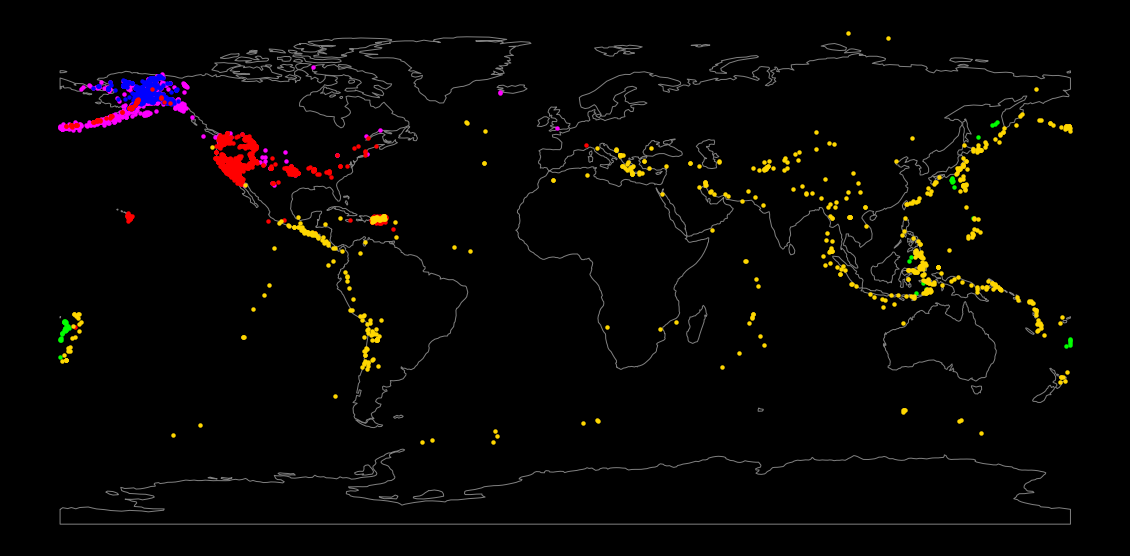

In [102]:
# Setup figure and axis
#f, ax = plt.subplots(1, figsize=(20, 10), facecolor='black')

#countries_gpd.plot(ax=ax, facecolor='none', edgecolor='grey')

# Plot noise in grey
#noise = df4.loc[df4['label']==-1]
#ax.scatter(noise['longitude'], noise['latitude'], c='lightcyan', s=20, linewidth=0)

# specify colors for each of the top 5 clusters
#colors = ['aqua', 'lime', 'red', 'fuchsia', 'yellow']

# loop over the clusters
#for i, label_num in enumerate(no_noise):
#    print("plotting cluster #%d..." % label_num)
    
#    # select all the samples with label equals "label_num"
#    this_cluster = df4.loc[df4['label']==label_num]
    
#    # plot earthquakes 
#    ax.scatter(this_cluster['longitude'], this_cluster['latitude'], 
#               linewidth=0, color=colors[i], s=20, alpha=1)
    
    
    
# Display the figure
#ax.set_axis_off()
#plt.show()
#import mplleaflet
#mplleaflet.show()
#ax.drawcountries()

C:\Users\Madhura\Anaconda3\envs\musa-620\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\Madhura\Anaconda3\envs\musa-620\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\Madhura\Anaconda3\envs\musa-620\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\Madhura\Anaconda3\envs\musa-620\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\Madhura\Anaconda3\envs\musa-620\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Us

:Layout
   .AdjointLayout.I   :AdjointLayout
      :Scatter   [latitude]   (depth,mag)
      :Histogram   [mag]   (mag_frequency)
   .AdjointLayout.II  :AdjointLayout
      :Scatter   [latitude]   (depth,mag)
      :Histogram   [mag]   (mag_frequency)
   .AdjointLayout.III :AdjointLayout
      :Scatter   [latitude]   (depth,mag)
      :Histogram   [mag]   (mag_frequency)
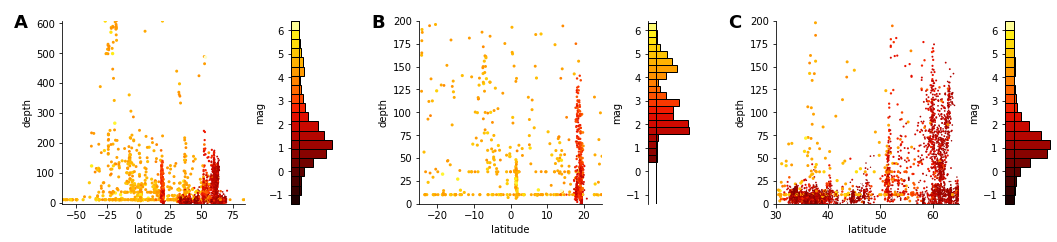

In [35]:
#scat = hv.Scatter(df5, vdims=['depth', 'mag'])
#scat = scat.opts(color='mag', s=dim('mag')*2)
#scat.hist('mag') + scat[-25:25, 0:200].hist('mag') + scat[30:65, 0:200].hist('mag')

In [76]:
#df5.head()

,latitude,longitude,depth,mag,rms,date,label,datetime,Latitude range
0,33.602500,-116.810167,9.21,0.44,0.08,14122019,0,2019-12-14T21:24:59.080Z,30 to 59 degrees
1,65.021900,-147.033000,10.10,1.40,1.12,14122019,2,2019-12-14T21:16:25.670Z,60 to 90 degrees
2,61.474100,-150.145100,40.10,1.30,0.26,14122019,2,2019-12-14T21:15:26.425Z,60 to 90 degrees
3,34.977833,-118.176000,7.58,1.73,0.30,14122019,4,2019-12-14T21:04:36.571Z,30 to 59 degrees
4,35.865333,-117.688167,4.03,1.11,0.20,14122019,0,2019-12-14T20:52:41.680Z,30 to 59 degrees


In [ ]:
#df5.hvplot.bar(x='latitude', y=['mag', 'depth'],
                 stacked=True, rot=90, width=800, legend='top_left')

:Scatter   [mag]   (depth,label)
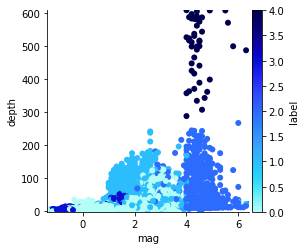

In [49]:
#df5.hvplot.scatter(x='mag', y='depth', c='label', width=1800, height=1800)

:Bivariate   [mag,depth]   (Density)
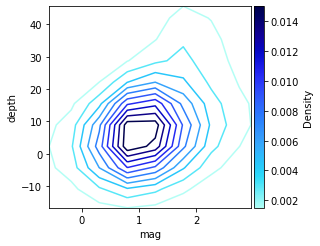

In [77]:
#df4.hvplot.bivariate(x='mag', y='depth', figsize=(10,5))

In [ ]:
#df5.hvplot.heatmap(x='mag', y='latitude', C='label', colorbar=True)

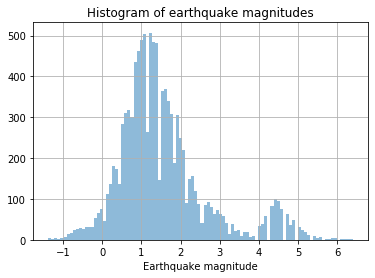

In [109]:
#df4.mag.hist(alpha=0.5, bins=100)
#plt.xlabel("Earthquake magnitude")
#plt.title("Histogram of earthquake magnitudes");